In [9]:
import os,sys


currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

pparentdir = os.path.dirname(parentdir)
sys.path.insert(0, pparentdir) 

print(parentdir,pparentdir)

import meta_util

from prototyping.Classes.BasicClasses import Mesh, Pline

from IntegralInvariants.II1DClasses import MSIIPline

path = '/home/linsel/Documents/PhD/Data/Fumane/annotated/coloured/selected/'
name = '710'

name_ll = name + '_LL'

filename = path + name + '_polyline.pline'

/home/linsel/Documents/PhD/segmentation/prototyping /home/linsel/Documents/PhD/segmentation


In [10]:
import os
import numpy as np
import time
import json
import trimesh
from trimesh.curvature import sphere_ball_intersection,discrete_gaussian_curvature_measure
from Functions.EssentialDecorators import timing

import networkx as nx 
from scipy.spatial import distance
# from scipy.spatial.distance import pdist
# from networkx.algorithms import tournament
import trimesh
import datetime

# Class MSIIPline

In [6]:
p = MSIIPline()
p.from_pline(path, name_ll)  

p.polygraphes_to_nx()

diameter = 2
n_rad = 16
p.calc_II_new_sphere (diameter,n_rad)

p.get_feature_vectors()

AttributeError: 'MSIIPline' object has no attribute 'from_pline'

In [9]:
# Test the selection of one radius or all radii and receiving dictionary of selections

rad = 0.22666666666666666

p.select_radius_angle(rad)
print(1)

# print(p.dict_radius_selected_angle)

# p.get_all_radii_angle()

# print(p.dict_radii_all_angle)

p.select_radius_dist(rad)

# print(p.dict_radius_selected_dist)

p.vertices
# print(p.dict_radii_all_dist)

1


{49174: array([-89.75876617, -86.82304382,  -2.39135027]),
 49195: array([-89.73081207, -86.96237183,  -2.41869044]),
 49215: array([-89.66475677, -87.10203552,  -2.38907242]),
 49240: array([-89.73200226, -87.2449646 ,  -2.54622412]),
 49262: array([-89.62897491, -87.41174316,  -2.52633238]),
 49285: array([-89.58197784, -87.52574158,  -2.52500343]),
 49313: array([-89.6062088 , -87.64756775,  -2.67347527]),
 49339: array([-89.53818512, -87.8084259 ,  -2.66160679]),
 49368: array([-89.60940552, -87.93821716,  -2.80591249]),
 49395: array([-89.53340149, -88.09114075,  -2.79915142]),
 49423: array([-89.48235321, -88.25285339,  -2.77423787]),
 49455: array([-89.60262299, -88.3589325 ,  -2.94276476]),
 49483: array([-89.46961212, -88.50391388,  -2.941185  ]),
 49517: array([-89.47580719, -88.67242432,  -3.06311607]),
 49545: array([-89.32360077, -88.77280426,  -2.93110609]),
 49580: array([-89.28281403, -88.93852997,  -3.07014155]),
 49618: array([-89.33303833, -89.07527924,  -3.21139526]

In [ ]:
p.exp_pline_funcvals(p.dict_radius_selected_dist)

p.exp_pline()

In [ ]:
p.exp_pline_funcvals(p.max_angle)

p.exp_pline()

In [ ]:
import numpy as np

def line_sphere_intersection(line_start, line_direction, sphere_center, sphere_radius):
    """
    Determines the intersection points of a line and a sphere in 3D space.

    Parameters:
        line_start (numpy array): The starting point of the line in 3D space.
        line_direction (numpy array): The direction of the line in 3D space.
        sphere_center (numpy array): The center of the sphere in 3D space.
        sphere_radius (float): The radius of the sphere.

    Returns:
        numpy array: An array containing the intersection points.
    """
    # Calculate the vector between the line start point and the sphere center
    p1_to_center = sphere_center - line_start

    # Calculate the projection of the p1_to_center vector onto the line direction vector
    projection = np.dot(p1_to_center, line_direction)

    # Calculate the distance between the line start point and the sphere center along the line direction
    distance_to_center = np.linalg.norm(projection * line_direction)

    # If the distance to the center is greater than the sphere radius, the line does not intersect the sphere
    if distance_to_center > sphere_radius:
        return np.array([])

    # Calculate the distance from the projection point to the intersection points
    distance_to_intersection = np.sqrt(sphere_radius**2 - distance_to_center**2)


    # Calculate the intersection points
    intersection_point1 = line_start + (projection - distance_to_intersection) * line_direction 
    intersection_point2 = line_start + (projection + distance_to_intersection) * line_direction

    print(intersection_point2/2)

    return np.array(intersection_point2)       


rp1, op, rp2 = np.array((1,1,1)),np.array((1,3,1)),np.array((3,3,1))

cp1 = line_sphere_intersection(op,rp1 - op,op,1)

cp2 = line_sphere_intersection(op,rp2,op,1)



[0.5 2.5 0.5]
[-1.  0.  0.]


In [ ]:
from skspatial.objects import Line, Sphere
from skspatial.plotting import plot_3d



rays = [[[1,2.5,1],[1,1,1]],
[[1.5,3,1],[3,3,1]]]

sphere_center = [1,3,1]

sphere_radius = 1  

cp1,cp2 =[line_sphere_intersection(origin, target, sphere_center, sphere_radius) for origin, target in rays]

print(cp1,cp2)

angle_neighbours(cp1, op, cp2) 


[1. 2. 1.] [2. 3. 1.]
[ 0. -1.  0.] [1. 0. 0.]


(90.0,
 array([[ 1.11022302e-16, -1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  1.11022302e-16,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))

In [ ]:
import numpy as np
from skspatial.objects import Line, Sphere
from skspatial.plotting import plot_3d
from scipy.spatial import distance

def line_sphere_intersection(origin, target, sphere_center, sphere_radius):
    """
    Calculates the intersection points of a line and a sphere in 3D.

    Parameters:
    line_point (numpy.ndarray): A numpy array of shape (3,) representing a point on the line.
    line_direction (numpy.ndarray): A numpy array of shape (3,) representing the direction of the line.
    sphere_center (numpy.ndarray): A numpy array of shape (3,) representing the center of the sphere.
    sphere_radius (float): A float representing the radius of the sphere.

    Returns:
    numpy.ndarray: A numpy array of shape (1, 3) representing the  nearest intersection point of the line and the sphere.
    """
    sphere = Sphere(sphere_center, sphere_radius)
    line = Line(origin, target)
    # Calculate the intersection points    
    point_a, point_b = sphere.intersect_line(line)
    
    pa_d = distance.euclidean(np.array(target),np.array(point_a)) 
    pb_d = distance.euclidean(np.array(target),np.array(point_b)) 

    print(point_a, point_b)
    print(pa_d,pb_d)
    if pa_d > pb_d:
        return np.array(point_b)
    elif pa_d < pb_d:
        return np.array(point_a)   

rp1, op, rp2 = np.array((1,1,1)),np.array((1,3,1)),np.array((3,3,1))

# rp1, op, rp2 = np.array((2,1,1)), np.array((1,1,1)), np.array((1,3,1))

# rp1, op, rp2 = np.array((2,1,1)),np.array((4,2,1)),np.array((2,2,1))

# rp2, op, rp1 = np.array((2,1,1)),np.array((4,2,1)),np.array((2,2,1))

print(rp1,rp2)

cp1 = line_sphere_intersection(op,rp1,op,2)

cp2 = line_sphere_intersection(op,rp2,op,2)


# angle_neighbours(rp1, op, rp2) 
angle_neighbours(cp1, op, cp2) 


[1 1 1] [3 3 1]
[-0.15470054  1.84529946 -0.15470054] [2.15470054 4.15470054 2.15470054]
1.8388033735239324 3.552295335908461
[-0.3764944   1.6235056   0.54116853] [2.3764944  4.3764944  1.45883147]
3.6750479742301976 1.5792474116193818


NameError: name 'angle_neighbours' is not defined

## Test with Testobject

In [1]:
import os,sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

pparentdir = os.path.dirname(parentdir)
sys.path.insert(0, pparentdir) 

sys.path.insert(0, f'{pparentdir}/minions') 


print(parentdir,pparentdir)



path = '/home/linsel/Documents/PhD/Data/Fumane/annotated/coloured/selected/'
name = '710'

name_ll = name + '_LL'

filename = path + name + '_polyline.pline'




/home/linsel/Documents/PhD/segmentation/prototyping /home/linsel/Documents/PhD/segmentation


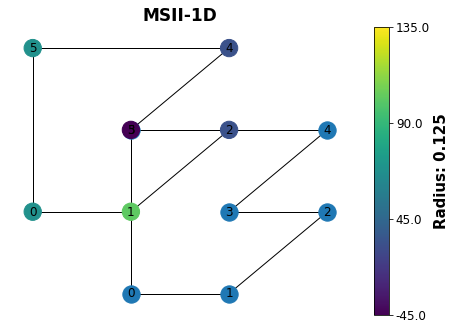

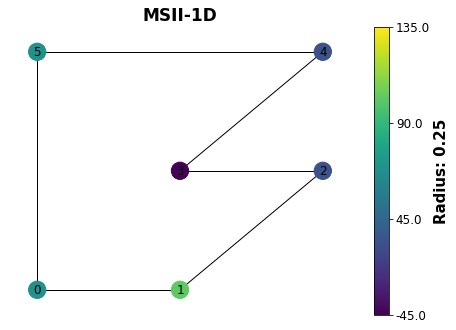

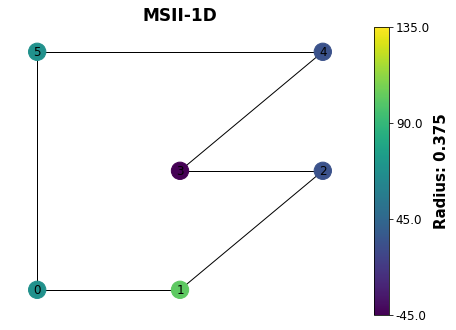

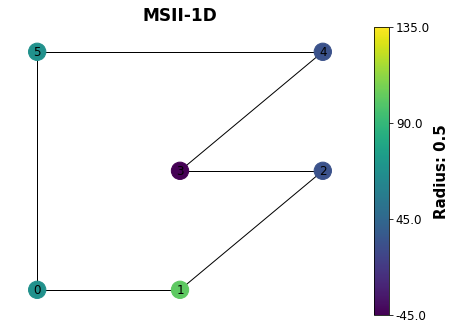

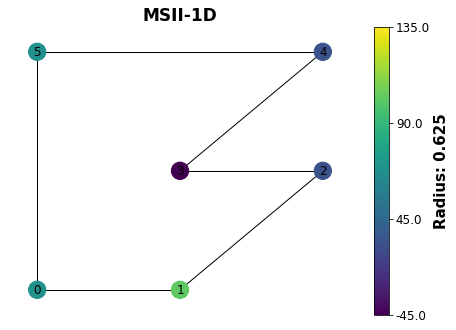

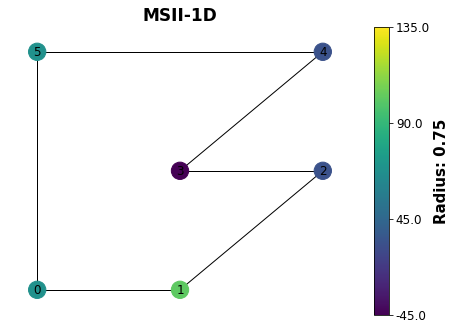

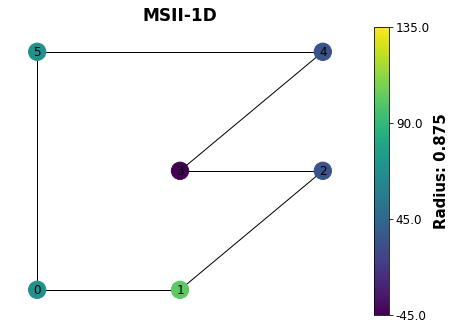

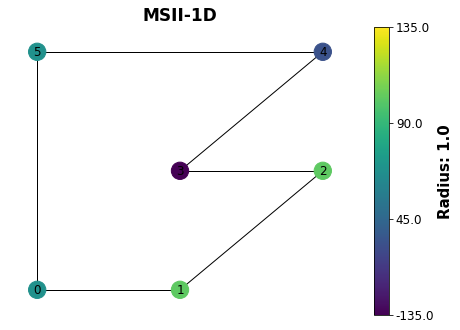

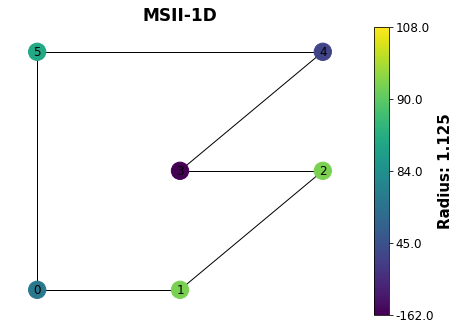

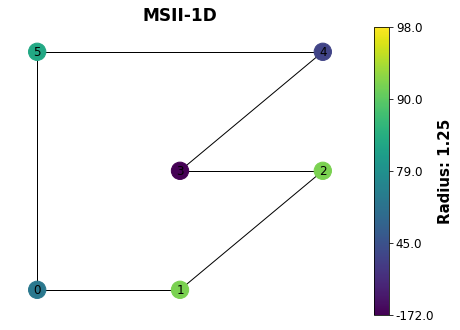

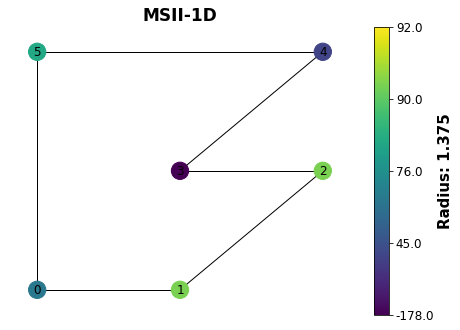

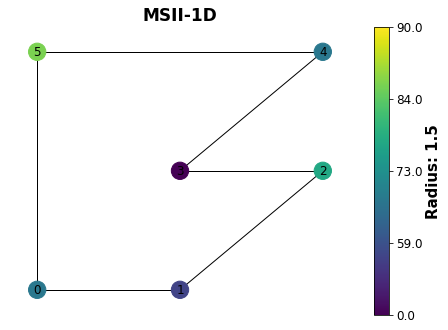

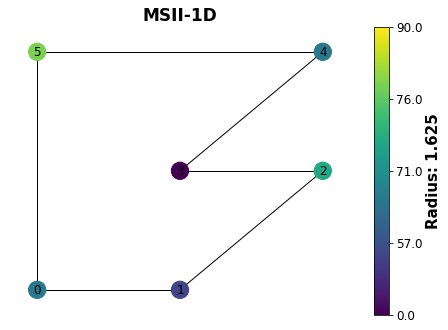

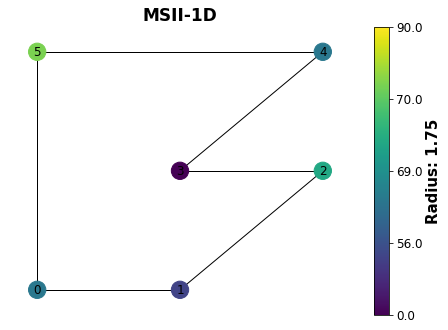

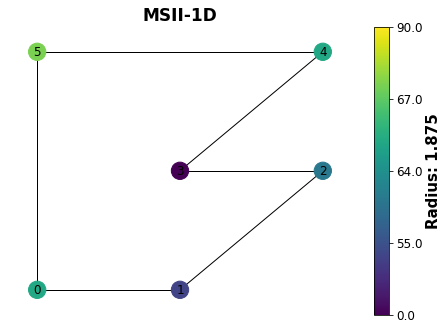

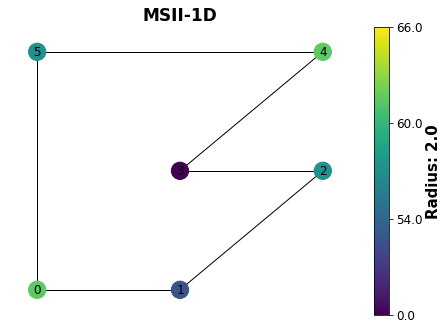

In [3]:


path = '/home/linsel/Documents/PhD/Data/Test_Models/'
ind = 'testpolyline'

radius = 2
nrad = 16

kwargs = {'path':path,
          'ind':ind,
          'nrad':nrad,
          'radius':radius}

TO = testObjects()

polyline_MSII_procedure(TO,**kwargs)


In [8]:


def plot_polyline_attribute(self,attr):

    self.pos_2d = {key:tuple(list(values)[:2]) for key,values in self.G.nodes.items()}

    labels = nx.get_edge_attributes(self.G,attr)

    print(labels)

    nx.draw(self.G,self.pos_2d, with_labels=labels)       
    





In [9]:
p = TO.testpolyline.pline 

radius = 2
n_rad = 16

p.nrad,p.maxrad = n_rad,radius

p.calc_II_new_sphere (radius,n_rad)
p.get_feature_vectors()


In [1]:



for rad in p.radii:

    p.select_radius_angle(rad)

    nx.set_node_attributes(TO.testpolyline.G, p.dict_radius_selected_angle, rad)

    



NameError: name 'p' is not defined

array([0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   , 1.125,
       1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   ])

In [14]:
# # plot_polyline_attribute(p,'pos')

# TO.testpolyline.add_attributes_nodes(p.dict_radius_selected_angle,'selected_radius')
# # p.max_angle
180/5

36.0

In [9]:
TPS = testObjects()

TPS.preparing(path,exp_path,name)

unit = 5
unit_angle = 180/unit

TPS.create_testpolyline_scaled_z([{ 0:unit_angle,1:unit_angle,2:unit_angle,3:unit_angle,4:unit_angle,5:unit_angle},
                                    p.dict_radius_selected_angle],
                                    unit)



(1, 1, 1.0)
(2, 1, 1.0)
(3, 2, 1.0)
(2, 2, 1.0)
(3, 3, 1.0)
(1, 3, 1.0)


KeyError: 0

In [7]:
# TO1 = TO

# {node + 10: (values['selected_radius'] / 180 * 2)
#      for node,values in TO1.testpolyline.G.nodes(data=True)}

# {(edge[0] + 10, edge[1] + 10)
#      for edge in TO1.testpolyline.G.edges}


TPS.testpolyline_scaled_z.testpolylines[0].nodes[0]
# TPS.testpolyline_scaled_z.testpolylines[1].nodes(data=True)

# TO1.testpolyline.G.nodes(data=True)
# {node: (degree / 180 * 2)
#     for node,degree in p.dict_radius_selected_angle.items()}

{'pos': (1, 1, 0.02777777777777778)}

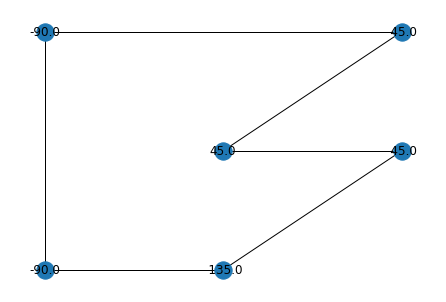

In [7]:
TO.testpolyline.plot_polyline_attribute('selected_radius')

(3, 2)


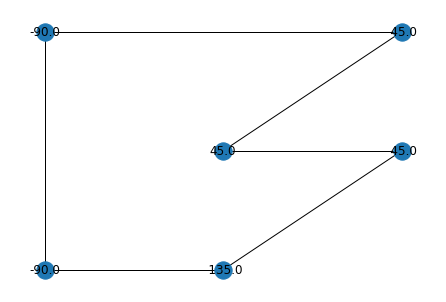

In [22]:
def plot_polyline_attribute(self,attr):

    self.pos_2d = {key:tuple(list(values)[:2]) for key,values in self.nodes.items()}

    labels = nx.get_node_attributes(self.G,attr)

    print(self.pos_2d[2])

    nx.draw(self.G,self.pos_2d, labels=labels)   

    posg = nx.layout.fruchterman_reingold_layout(self.G)

    plt.Circle(posg[1], radius=1)       

    plt.show()  

plot_polyline_attribute(TO.testpolyline,'selected_radius') 




In [17]:
p.exp_pline_funcvals(p.max_angle)

p.exp_pline()

In [41]:
import math
from Functions.essentialDecorators import timing

def get_max_outline(graph,origin,target):
    outline_list = list(nx.all_simple_paths (graph,origin, target))
    return outline_list

def get_longest_polyline (graph):
    longest_polyline = max(nx.connected_components(graph))
    return longest_polyline

def get_cycle(graph):

    max_cycle = max([len(cycle) for cycle in nx.cycle_basis(M.polygraphs[1])])

    cycle = [cycle for cycle in nx.cycle_basis(M.polygraphs[1]) if len(cycle) == max_cycle][0]

    cycle = cycle + [cycle[0]]

    rev_cycle = list(reversed(cycle))

    return cycle,rev_cycle

def get_graph_polylines (graph):
    longest_polyline = nx.connected_components(graph)
    return longest_polyline

def line_sphere_intersection(line_start, line_dir, sphere_center, sphere_radius):
    """
    Determines the intersection point(s) between a line and a sphere in 3D.
    
    Parameters:
    line_start (tuple): the starting point of the line (x, y, z).
    line_dir (tuple): the direction vector of the line (x, y, z).
    sphere_center (tuple): the center point of the sphere (x, y, z).
    sphere_radius (float): the radius of the sphere.
    
    Returns:
    A tuple containing the intersection point(s) between the line and the sphere, or None if there is no intersection.
    """
    # Calculate the coefficients of the quadratic equation
    a = line_dir[0]**2 + line_dir[1]**2 + line_dir[2]**2
    b = 2 * (line_start[0]*line_dir[0] + line_start[1]*line_dir[1] + line_start[2]*line_dir[2] - 
             sphere_center[0]*line_dir[0] - sphere_center[1]*line_dir[1] - sphere_center[2]*line_dir[2])
    c = line_start[0]**2 + line_start[1]**2 + line_start[2]**2 + sphere_center[0]**2 + sphere_center[1]**2 + sphere_center[2]**2 - 2*(
        line_start[0]*sphere_center[0] + line_start[1]*sphere_center[1] + line_start[2]*sphere_center[2]) - sphere_radius**2
    
    # Calculate the discriminant
    disc = b**2 - 4*a*c
    
    # If the discriminant is negative, the line and sphere do not intersect
    if disc < 0:
        return None
    
    # Calculate the intersection point(s)
    t1 = (-b + math.sqrt(disc)) / (2*a)
    t2 = (-b - math.sqrt(disc)) / (2*a)
    p1 = (line_start[0] + t1*line_dir[0], line_start[1] + t1*line_dir[1], line_start[2] + t1*line_dir[2])
    
    # If the discriminant is zero, there is only one intersection point
    if disc == 0:
        return p1
    
    # p2 = (line_start[0] + t2*line_dir[0], line_start[1] + t2*line_dir[1], line_start[2] + t2*line_dir[2])

    return p1#, p2

def create_start_list(p_list,pos_iter):
    
    # using % operator and loop
    # cyclic iteration in list
    
    p_res = []
    for i in range(len(p_list)):
        p_res.append(p_list[pos_iter % len(p_list)])
        pos_iter = pos_iter + 1
    
    return p_res



In [42]:
import datetime


class extended_Mesh(Mesh):

    def polyline_to_nx (self):

        polygraphs = {}

        for label,values in self.ridges_label_dict.items():
            # Create an empty graph
            G = nx.Graph()

            # Add nodes and edges from the list of tuples
            for edge in values:
                G.add_nodes_from(edge)
                G.add_edge(*edge)

            polygraphs[label] = G

        self.polygraphs = polygraphs

    def calc_II_new_sphere (self,max_radius,n_radii):

        self.max_radius = max_radius
        self.n_rad = n_radii
        self.ego_graph_r = 300

        self.polylinedata = {}

        self.radii = np.linspace(0.1, max_radius, 16)

        self.iterate_polygraphs_new_sphere()

    @timing
    def iterate_polygraphs_new_sphere (self):

        for label,G in self.polygraphs.items():

            self.begin = datetime.datetime.now()
            self.label = int(label)
            self.polylinedata[self.label] = {}

            self.G = G

            self.len_nodes = len(self.G.nodes())    
            if self.label >= 14:
                print(self.label)
                return 

            self.get_intersects_new()

    @timing
    def get_intersects_new (self):
        begin = datetime.datetime.now()
        first_run = datetime.datetime.now()
        intersects = {}
        polyline,rev_polyline = get_cycle(self.G)

        if self.label == 15:
            print(self.label)
            return 

        for num,node in enumerate(polyline):
        

            intersects [node] = {}  

            temp_polyline = create_start_list(polyline,polyline.index(node))    

            rev_temp_polyline =  create_start_list(rev_polyline,rev_polyline.index(node))      


            intersects [node] = {float(radius):self.find_intersects_new(self.vertices,temp_polyline,rev_temp_polyline,radius) for radius in self.radii}       #(self,vertices,poly,rev_poly,treshold)

            self.polylinedata[self.label] = intersects

            if num % 1000 == 0:

                print((datetime.datetime.now()-begin))
                print((datetime.datetime.now()-begin)/ (num+1) * len(self.G.nodes()))
                print(num,len(self.G.nodes()))      

    def try_complete_graph_intersect_new(self,G,vertices,node,polyline,radius):

        intersects = self.find_intersects_new(self.vertices,polyline,radius) 

        try: 
            if not len(intersects['down_stream'] ['II1D_crsp']) > 0 or not len(intersects ['up_stream']['II1D_crsp']) > 0 :

                neighs = list(nx.neighbors(G,node))

                polyline = get_longest_outline(G,node,neighs[0])

                intersects = self.find_intersects_new(vertices,polyline,radius) 

            else: 
                intersects = intersects
        except:
            intersects = {'down_stream':{'II1D_crsp':np.array([0,0,0])}}
            intersects.update({'up_stream':{'II1D_crsp':np.array([0,0,0])}})

        return intersects

    def find_intersects_new(self,vertices,poly,rev_poly,treshold):   
                
        down_stream = self.stream_intersect_new(vertices,rev_poly,treshold)
        up_stream = self.stream_intersect_new(vertices,poly,treshold)

        dist_pnts = {
                    'down_stream':down_stream,
                    'up_stream':up_stream
                    }
        
        return dist_pnts

    #intersection functions
    def stream_intersect_new(self,vertices,pol,treshold):

        dist_pnts_dict = {'euclidean_dist':{},
                        'dist':{},
                        'first_node_outside':{},
                        'II1D_crsp':{},
                        'node_dist':{}}

        dist = 0
        n_pos = 0
                    
        for pos in range(len(pol)-1):

            n_pos += 1
            euclid_dist = distance.euclidean(vertices[pol[0]],vertices[pol[n_pos]]) 
            
            
            if euclid_dist > treshold:                    
                dist += distance.euclidean( vertices[pol[pos]],
                                            vertices[pol[n_pos]])


                II1D_crsp = line_sphere_intersection(vertices[pol[pos]],vertices[pol[n_pos]], vertices[pol[0]], treshold)
                # II1D.get_all_crossingpoints( ico_temp,
                #                                         [vertices[polyline[0]]],
                #                                         [vertices[polyline[n_pos]]])

                dist_pnts_dict ['euclidean_dist'] = euclid_dist
                dist_pnts_dict ['II1D_crsp'] = II1D_crsp
                dist_pnts_dict ['dist'] = dist         
                dist_pnts_dict ['first_node_outside'] = pol[n_pos] 
                dist_pnts_dict ['node_dist'] = pos 

                return dist_pnts_dict
                            
            else:
                dist += distance.euclidean( vertices[pol[pos]],vertices[pol[n_pos]])       

In [46]:
n_rad = 16

diameter = 2

M.calc_II_new_sphere(diameter,n_rad)

0:00:00.006067
0:00:06.568144
0 1072
0:00:02.622086
0:00:02.808640
1000 1072
func:'get_intersects_new' args:[(<__main__.extended_Mesh object at 0x7fa35c445e80>,), {}] took: 2.6999 sec
func:'iterate_polygraphs_new_sphere' args:[(<__main__.extended_Mesh object at 0x7fa35c445e80>,), {}] took: 2.6999 sec
